# 1. Data Description
### 1.1 Read in Data and Preview

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read the data
players  <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Preview datasets
head(players)
head(sessions)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### 1.2 Overview: Number of Observations and Variables

In [4]:
dataset_overview <- tibble(
  dataset        = c("players", "sessions"),
  n_observations = c(nrow(players), nrow(sessions)),
  n_variables    = c(ncol(players), ncol(sessions))
)

dataset_overview

dataset,n_observations,n_variables
<chr>,<int>,<int>
players,196,7
sessions,1535,5


### 1.3 Variable Summaries (players.csv, sessions.csv)

In [5]:
players_var_summary <- tibble(
  variable = c("experience", "subscribe", "hashedEmail",
               "played_hours", "name", "gender", "Age"),
  
  type = c("categorical", "categorical", "character",
           "numeric", "character", "categorical", "numeric"),
  
  description = c(
    "Self reported experience level",
    "YES or NO for subscribed to the game-related newsletter",
    "Hashed email identifier used to link to sessions.csv",
    "Total hours the player has spent on the server",
    "Player's in-game name (may not be unique)",
    "Player gender",
    "Player age in years"
  )
)

players_var_summary

sessions_var_summary <- tibble(
  variable = c("hashedEmail", "start_time", "end_time",
               "original_start_time", "original_end_time"),
  
  type = c("character", "character", "character",
           "numeric", "numeric"),
  
  description = c(
    "Hashed email identifier used to link to players.csv",
    "Session start time as readable string (dd/mm/yyyy HH:MM)",
    "Session end time as readable string",
    "Session start time as system clock value",
    "Session end time as system clock value"
  )
)

sessions_var_summary


variable,type,description
<chr>,<chr>,<chr>
experience,categorical,Self reported experience level
subscribe,categorical,YES or NO for subscribed to the game-related newsletter
hashedEmail,character,Hashed email identifier used to link to sessions.csv
played_hours,numeric,Total hours the player has spent on the server
name,character,Player's in-game name (may not be unique)
gender,categorical,Player gender
Age,numeric,Player age in years


variable,type,description
<chr>,<chr>,<chr>
hashedEmail,character,Hashed email identifier used to link to players.csv
start_time,character,Session start time as readable string (dd/mm/yyyy HH:MM)
end_time,character,Session end time as readable string
original_start_time,numeric,Session start time as system clock value
original_end_time,numeric,Session end time as system clock value


### 1.4 Numeric Summary Statistics (2 decimals)

In [6]:
players_numeric_summary <- players |>
  summarise(
    played_hours_mean = round(mean(played_hours, na.rm = TRUE), 2),
    played_hours_sd   = round(sd(played_hours, na.rm = TRUE), 2),
    played_hours_min  = round(min(played_hours, na.rm = TRUE), 2),
    played_hours_max  = round(max(played_hours, na.rm = TRUE), 2),
    Age_mean          = round(mean(Age, na.rm = TRUE), 2),
    Age_sd            = round(sd(Age, na.rm = TRUE), 2),
    Age_min           = round(min(Age, na.rm = TRUE), 2),
    Age_max           = round(max(Age, na.rm = TRUE), 2)
  )

players_numeric_summary

sessions_numeric_summary <- sessions |>
  summarise(
    original_start_time_mean = round(mean(original_start_time, na.rm = TRUE), 2),
    original_start_time_sd   = round(sd(original_start_time, na.rm = TRUE), 2),
    original_start_time_min  = round(min(original_start_time, na.rm = TRUE), 2),
    original_start_time_max  = round(max(original_start_time, na.rm = TRUE), 2),
    original_end_time_mean   = round(mean(original_end_time, na.rm = TRUE), 2),
    original_end_time_sd     = round(sd(original_end_time, na.rm = TRUE), 2),
    original_end_time_min    = round(min(original_end_time, na.rm = TRUE), 2),
    original_end_time_max    = round(max(original_end_time, na.rm = TRUE), 2)
  )

sessions_numeric_summary

played_hours_mean,played_hours_sd,played_hours_min,played_hours_max,Age_mean,Age_sd,Age_min,Age_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,0,223.1,21.14,7.39,9,58


original_start_time_mean,original_start_time_sd,original_start_time_min,original_start_time_max,original_end_time_mean,original_end_time_sd,original_end_time_min,original_end_time_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,3557491589,1.7124e+12,1.72733e+12,1.719196e+12,3552813134,1.7124e+12,1.72734e+12


### 1.5 Categorical summaries

In [7]:
# players: experience
players_experience_counts <- players |>
  count(experience)

players_experience_counts

# players: subscribe
players_subscribe_counts <- players |>
  count(subscribe)

players_subscribe_counts

# players: gender
players_gender_counts <- players |>
  count(gender)

players_gender_counts

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


### 1.6 Missing values

In [8]:
players_missing <- tibble(
  variable   = c("experience", "subscribe", "hashedEmail",
                 "played_hours", "name", "gender", "Age"),
  n_missing  = c(
    sum(is.na(players$experience)),
    sum(is.na(players$subscribe)),
    sum(is.na(players$hashedEmail)),
    sum(is.na(players$played_hours)),
    sum(is.na(players$name)),
    sum(is.na(players$gender)),
    sum(is.na(players$Age))
  )
)

players_missing

sessions_missing <- tibble(
  variable  = c("hashedEmail", "start_time", "end_time",
                "original_start_time", "original_end_time"),
  n_missing = c(
    sum(is.na(sessions$hashedEmail)),
    sum(is.na(sessions$start_time)),
    sum(is.na(sessions$end_time)),
    sum(is.na(sessions$original_start_time)),
    sum(is.na(sessions$original_end_time))
  )
)

sessions_missing

variable,n_missing
<chr>,<int>
experience,0
subscribe,0
hashedEmail,0
played_hours,0
name,0
gender,0
Age,2


variable,n_missing
<chr>,<int>
hashedEmail,0
start_time,0
end_time,2
original_start_time,0
original_end_time,2


### 1.7 Data Quality

#### Uniqueness of hashedEmail in players

In [9]:
players_hashedEmail_uniqueness <- players |>
  summarise(
    n_players          = n(),
    n_unique_hashed_id = length(unique(hashedEmail))
  )

players_hashedEmail_uniqueness

n_players,n_unique_hashed_id
<int>,<int>
196,196


#### Number of players have at least one session

In [10]:
players_with_sessions <- sessions |>
  select(hashedEmail) |>
  distinct() |>
  inner_join(players, by = "hashedEmail") |>
  summarise(n_players_with_sessions = n())

players_with_sessions

n_players_with_sessions
<int>
125


# 2. Question Establishment

### Chosen Broad Question: 
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Chosen Specific Question: 
Can a player’s experience level, age, gender, and total hours played predict whether they subscribe to the newsletter in the players.csv dataset?

### Description
* Response variable: **subscribe** is chosen since its a TRUE/FALSE, categorical variable, it is available for prediction using classification algorithms
* Explanatory variables:
    * **experience** (factor: Pro, Veteran, etc.)
    * **played_hours** (numeric)
    * **Age** (numeric)
    * **gender** (categorical)
* How data will help answer question:
    * players.csv directly provides all predictors.
    * No merging is needed, unless more specific description is wanted e.g., number of sessions
    * subscribe is cleanly provided as a catagorical variable with only 2 classes
* Wrangling needed:
    * Convert categorical variables (experience, gender) to factors
    * Remove missing values (NA) in all predictors
    * Possibly normalize played_hours
    * Result in a tidy tibble by removing redundent or duplicate columns (hashedEmail)
* Predictive method:
    * Works with k-NN classification

# 3. Data Wrangling

### 3.1 Make Tidy 

In [12]:
players_tidy <- players |>
  mutate(
    experience = as_factor(experience),
    subscribe = as_factor(subscribe),
    gender = as_factor(gender),
    hashedEmail = as.character(hashedEmail)
  )
sessions_tidy <- sessions |>
  mutate(
    start_time = as_datetime(start_time, format = "%d/%m/%Y %H:%M"),
    end_time   = as_datetime(end_time,   format = "%d/%m/%Y %H:%M"),
    hashedEmail = as.character(hashedEmail)
  )


### 3.2 Mean value for each quantitative variable in players.csv 

In [14]:
players_means <- players_tidy |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
  )

players_means

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


### 3.3 Visual Plots

#### 3.3.1 Distribution of Player Ages

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


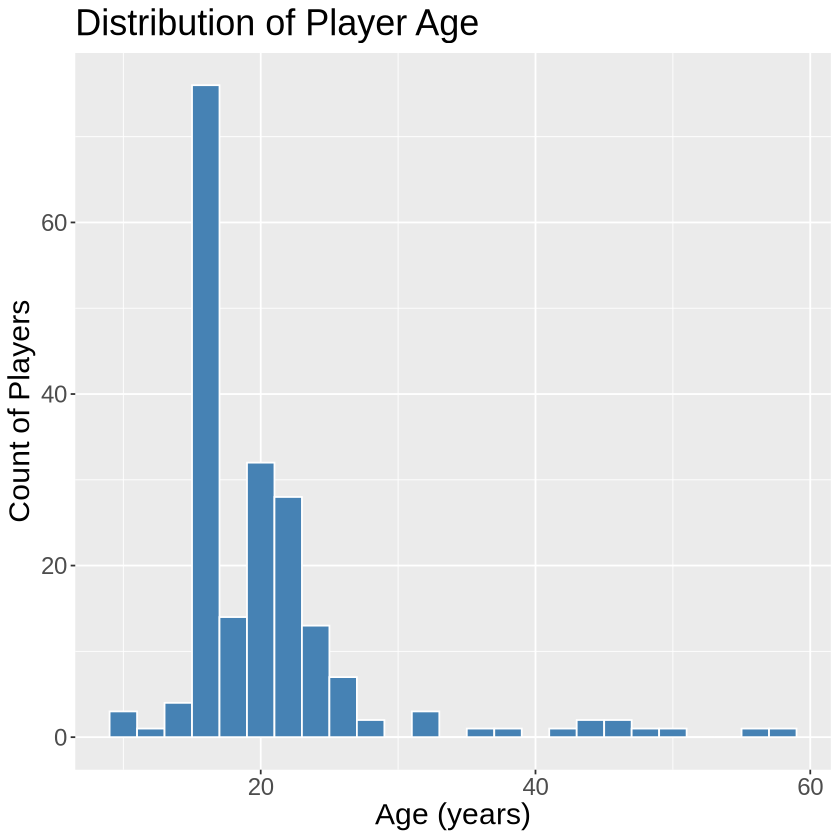

In [23]:
theme_update(text = element_text(size = 18))
ggplot(players_tidy, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Count of Players"
  )


Player age shows a noticeable peak around about 12 years old, and most players fall within roughly the 12-to-28 age range.

#### 3.3.2 Played Hours Distribution

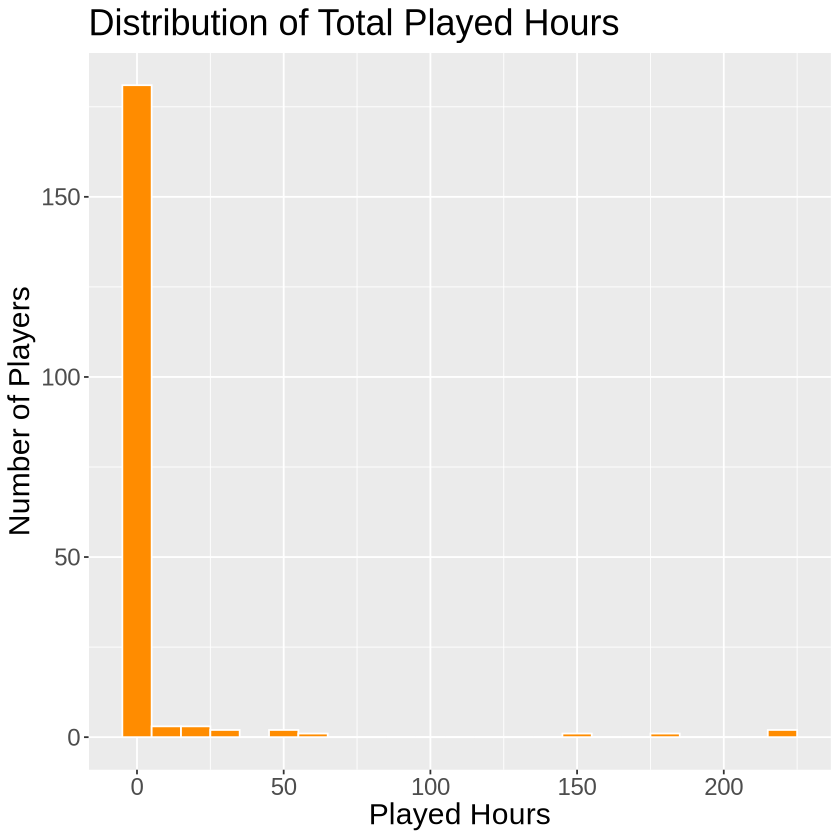

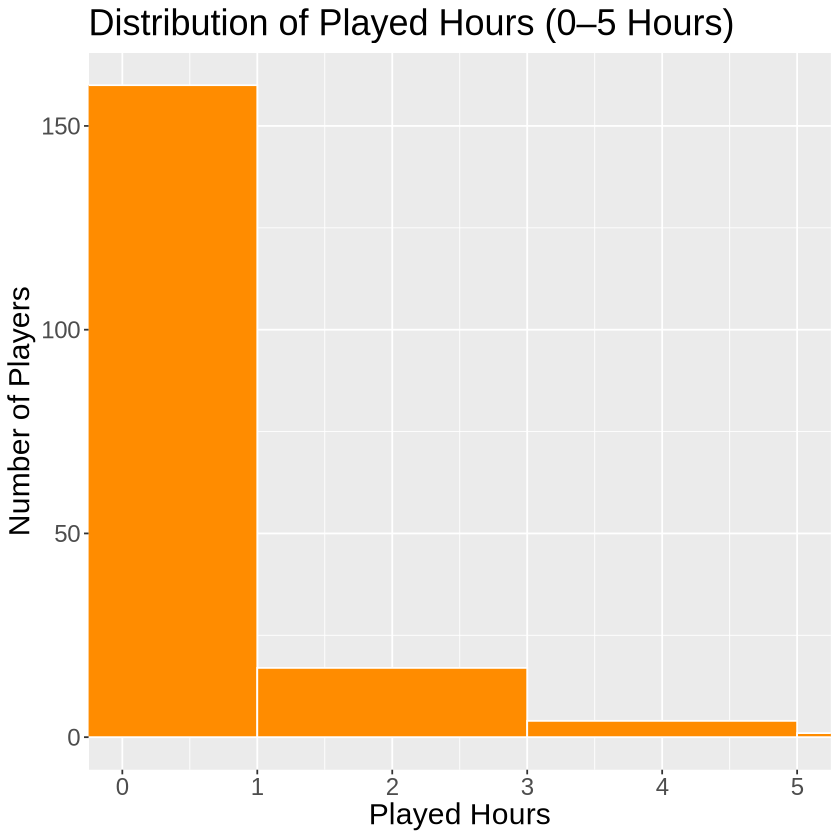

In [39]:
ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "darkorange", color = "white") +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Played Hours",
    y = "Number of Players"
  )

ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 2, fill = "darkorange", color = "white") +
  coord_cartesian(xlim = c(0, 5)) +
  labs(
    title = "Distribution of Played Hours (0–5 Hours)",
    x = "Played Hours",
    y = "Number of Players"
  )


Most players logged within a single hour of total playtime, with only a small fraction exceeding that.

#### 3.3.3 Played Hours vs Age

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


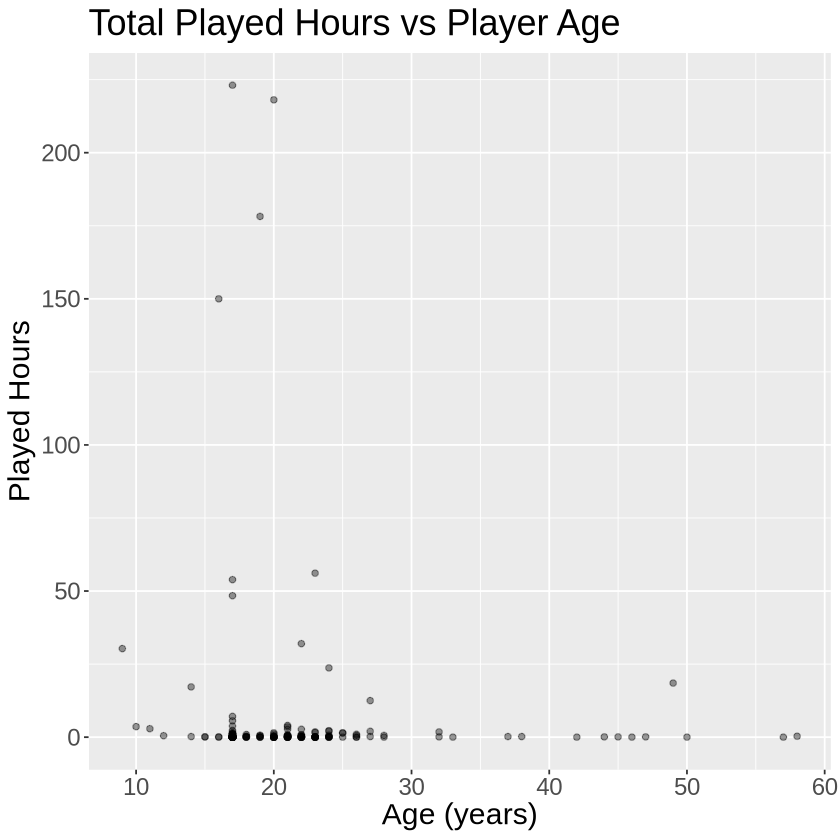

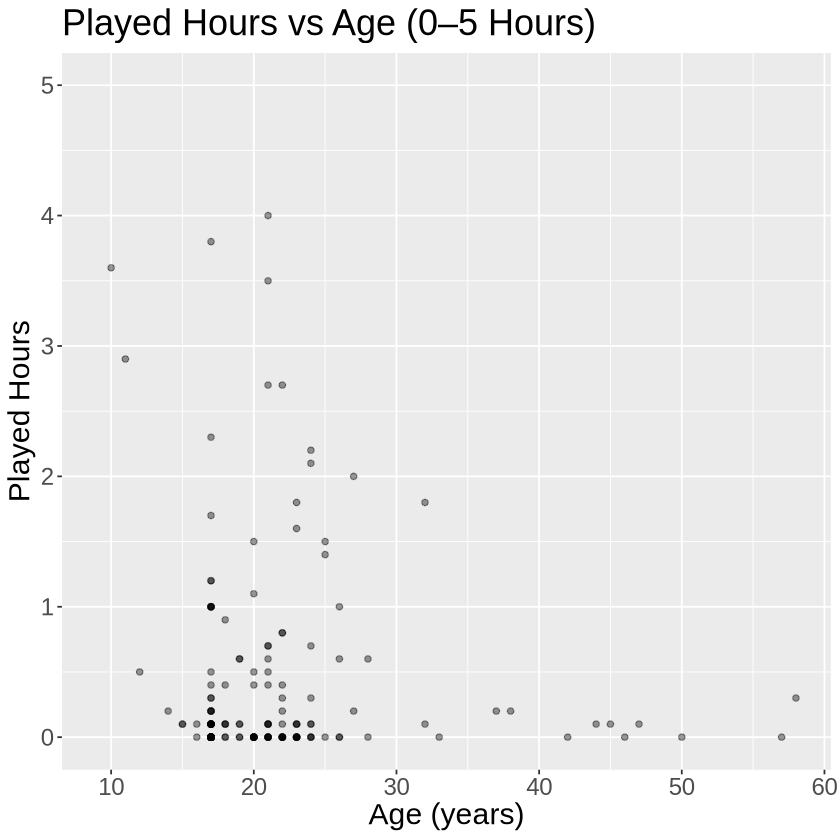

In [40]:
ggplot(players_tidy, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  labs(
    title = "Total Played Hours vs Player Age",
    x = "Age (years)",
    y = "Played Hours"
  )

ggplot(players_tidy, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  coord_cartesian(ylim = c(0, 5)) +
  labs(
    title = "Played Hours vs Age (0–5 Hours)",
    x = "Age (years)",
    y = "Played Hours"
  )



The plot shows that players aged roughly 10–29 tend to accumulate more hours played, while players outside this range are almost all under 1 hour.

#### 3.3.4 Experience Level by Mean Played Hours

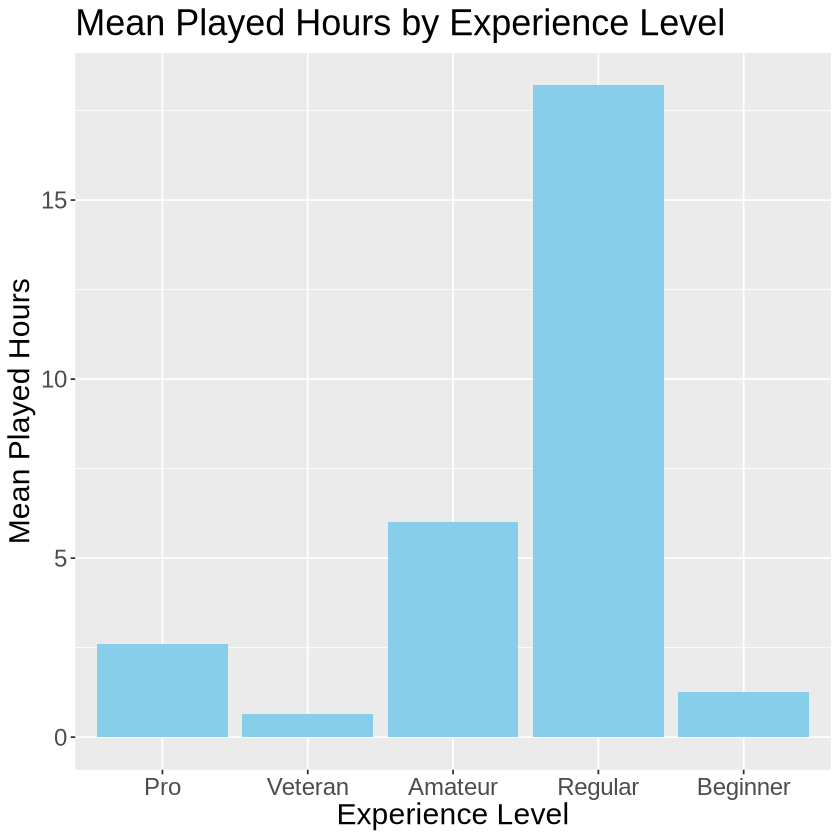

In [37]:
players_tidy |>
  group_by(experience) |>
  summarise(mean_played = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = mean_played)) +
  geom_col(fill = "skyblue") +
  labs(
    title = "Mean Played Hours by Experience Level",
    x = "Experience Level",
    y = "Mean Played Hours"
  )


The plot shows that players who identify as regulars tend to play far more than any other experience group.

# 4. Methods and Plan

### Proposed Method: K-Nearest Neighbors (K-NN) Classification

### Why this method is appropriate
* K-NN directly supports a categorical response variable with known classes, in this case is **subscribe** (YES/NO).
* It works with both numeric and categorical predictors once scaling/encoding is applied.
* K-NN is part of the course teachings

### Assumptions required
* Distances between players must meaningfully reflect similarity after standardizing numeric predictors.
* Players who are “nearby” in feature space are assumed to have similar subscription behavior.

### Potential limitations or weaknesses
* Sensitive to variable scaling; numeric predictors must be standardized or they dominate the distance metric.
* Performance can decrease in effectiveness with too many predictors.
* Distance-based handling of categorical variables may not fully capture their meaning.

### How the model will be compared and selected
* Use 5-fold cross-validation on the training data.
* Tune the number of neighbors K across a range of values.
* Compare models using accuracy, and check balanced accuracy if class imbalance becomes an issue.
* Select the K that gives the highest average cross-validated accuracy.

### Data processing plan
* Convert **experience** and **gender** into factor variables.
* Standardize numeric predictors (**age**, **played_hours**) using `step_scale()` and `step_center()`.
* Remove any rows with missing values for predictors or the response.
* Perform a 75% training / 25% testing split, grouped by **subscribe**.
* Use only the training set for resampling, cross-validation, and model tuning.
* Fit the final model with the chosen K on the full training data.
* Evaluate the final model once on the test set to estimate out-of-sample prediction accuracy.
